# Model training using Logistic Regression

In [58]:
import joblib
# Load them back
data = joblib.load("resampled_data.joblib")
X_train_res = data["X_train_res"]
y_train_res = data["y_train_res"]
X_test = data["X_test"]
y_test = data["y_test"] 

print("✅ Resampled data loaded successfully")

✅ Resampled data loaded successfully


In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

1. Importing StandardScaler
- StandardScaler is used to standardize numeric features.

- It transforms the data so that each feature has:

- Mean = 0

- Standard deviation = 1

2. Initialize the scaler
- Creates a scaler object that will calculate mean and std from your training data.

3. Fit and transform training data
- fit_transform() does two things:

- Fit: Computes the mean and std of each column in X_train_res.

- Transform: Standardizes the training data using the computed mean & std.

- X_train_scaled is now a NumPy array with all numeric features standardized.

4. Transform test data
- Uses the mean & std from the training set to standardize X_test.

- Important: Do NOT use fit_transform on test data — it should always be scaled using training statistics.

Output:

- X_train_scaled and X_test_scaled have mean ≈ 0 and std ≈ 1.

- Prepares data for models that need standardized input.

In [63]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=5000, solver='lbfgs', class_weight='balanced', random_state=42)

log_reg.fit(X_train_res, y_train_res)

LogisticRegression(class_weight='balanced', max_iter=5000, random_state=42)

Explanation:

- LogisticRegression(): Creates a logistic regression model, which predicts the probability of classes for classification tasks.

- max_iter=5000: Allows up to 5000 iterations for the optimization algorithm to converge. Useful if the default 100 iterations is not enough.

- solver='lbfgs': The algorithm used to optimize the model parameters (weights). lbfgs is efficient for small-to-medium datasets.

- class_weight='balanced': Adjusts the weight of each class automatically to account for imbalanced classes in your target variable.

- random_state=42: Fixes the random seed to make the results reproducible.

- .fit(X_train_res, y_train_res): Trains the model on your (possibly resampled) training data X_train_res and target y_train_res.

Output:

- The model learns coefficients for each feature.

- You can now predict class labels using log_reg.predict(X_test) or probabilities using log_reg.predict_proba(X_test).

In [65]:
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score, confusion_matrix, log_loss
# Predictions
y_train_pred = log_reg.predict(X_train_res)
y_test_pred = log_reg.predict(X_test)

# Probabilities for log loss
y_test_proba = log_reg.predict_proba(X_test)

# Metrics
print("=== TRAIN PERFORMANCE ===")
print("Balanced Accuracy:", balanced_accuracy_score(y_train_res, y_train_pred))
print(classification_report(y_train_res, y_train_pred))

print("\n=== TEST PERFORMANCE ===")
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_test_pred))
print("Log Loss:", log_loss(y_test, y_test_proba))
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

=== TRAIN PERFORMANCE ===
Balanced Accuracy: 0.9965736661771905
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2043
         1.0       0.99      1.00      0.99      2043
         2.0       1.00      0.99      1.00      2043

    accuracy                           1.00      6129
   macro avg       1.00      1.00      1.00      6129
weighted avg       1.00      1.00      1.00      6129


=== TEST PERFORMANCE ===
Balanced Accuracy: 0.8688188028742344
Log Loss: 0.04627679055375779
              precision    recall  f1-score   support

         0.0       0.33      0.67      0.44         3
         1.0       0.91      0.95      0.93        86
         2.0       1.00      0.99      0.99       511

    accuracy                           0.98       600
   macro avg       0.75      0.87      0.79       600
weighted avg       0.98      0.98      0.98       600

Confusion Matrix:
 [[  2   1   0]
 [  4  82   0]
 [  0   7 504]]


This code evaluates the trained logistic regression model: it predicts classes and probabilities for train and test data, then computes metrics—balanced accuracy, classification report, log loss, and confusion matrix—to measure performance and see how well the model fits and generalizes.

Output:

- Train metrics: How well the model fits training data.

- Test metrics: How well the model generalizes to unseen data.

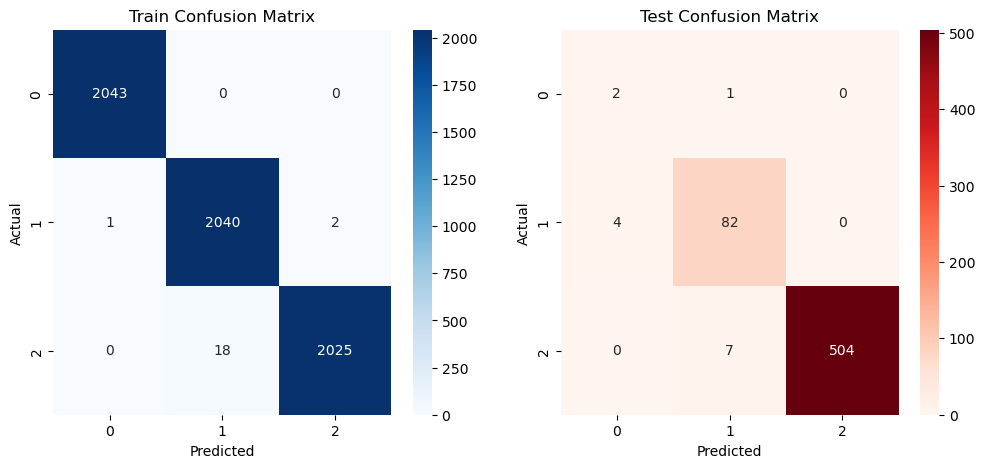

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cmt = confusion_matrix(y_train_res, y_train_pred)
cmp = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(12,5))

# Train
plt.subplot(1,2,1)
sns.heatmap(cmt, annot=True, fmt='d', cmap='Blues')
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Test
plt.subplot(1,2,2)
sns.heatmap(cmp, annot=True, fmt='d', cmap='Reds')
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

This code plots the confusion matrices for training and test sets:

- cmt and cmp store the confusion matrices.

- Two subplots are created:

    - Left: Train confusion matrix (blue)
    
    - Right: Test confusion matrix (red)

- sns.heatmap visualizes the counts of true vs predicted classes.

Output: Two heatmaps showing how well the model predicted each class for train and test data.